In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
Wineries = pd.read_csv("C:\\Users\\ashri\\Desktop\\Ontologies\\wineries.csv")
Ava = pd.read_csv("C:\\Users\\ashri\\Desktop\\Ontologies\\ava.csv")

In [11]:
null_cunt = Wineries.isnull().sum()
Wineries = Wineries.fillna('Unknown')

In [13]:
Dataframe= pd.merge(Wineries, Ava, on='ava', how='left')
Dataframe = Dataframe.fillna("unknown")

In [14]:
data = Dataframe.head(2)

In [18]:
AVA = Dataframe['ava'].unique()

In [19]:
# List of wines
wines = ['Cabernet Sauvignon', 'Merlot', 'Chardonnay', 'Pinot Noir', 'Syrah', 
         'Sauvignon Blanc', 'Riesling', 'Zinfandel', 'Grenache', 'Tempranillo']

In [34]:
import random
#Map each unique AVA to a random list of wines
ava_to_wines = {ava: random.sample(wines, random.randint(2, 3)) for ava in AVA}

# Display the mapping
print(ava_to_wines)

{'Napa Valley': ['Chardonnay', 'Tempranillo'], 'Howell Mountain': ['Cabernet Sauvignon', 'Zinfandel'], 'Calistoga': ['Grenache', 'Chardonnay', 'Sauvignon Blanc'], 'Diamond Mountain District': ['Sauvignon Blanc', 'Riesling'], 'St Helena': ['Sauvignon Blanc', 'Riesling', 'Chardonnay'], 'Chiles Valley District': ['Pinot Noir', 'Zinfandel', 'Merlot'], 'Spring Mountain District': ['Grenache', 'Zinfandel', 'Chardonnay'], 'Rutherford': ['Merlot', 'Chardonnay'], 'Oakville': ['Riesling', 'Syrah'], 'Atlas Peak': ['Merlot', 'Chardonnay', 'Tempranillo'], 'Yountville': ['Zinfandel', 'Sauvignon Blanc', 'Syrah'], 'Stags Leap District': ['Chardonnay', 'Sauvignon Blanc', 'Syrah'], 'Mount Veeder': ['Merlot', 'Sauvignon Blanc'], 'Oak Knoll District of Napa Valley': ['Cabernet Sauvignon', 'Riesling'], 'Coombsville': ['Tempranillo', 'Sauvignon Blanc', 'Chardonnay'], 'Los Carneros': ['Grenache', 'Syrah', 'Merlot'], 'Unknown': ['Syrah', 'Zinfandel']}


In [35]:
Dataframe.head()

,name,status,prod_orig,prod_curr,estab_date,total_size,ava,boundary_x,boundary_y,Assigned Wines
0,AETNA SPRING CELLARS,PROD,2000,20000,06/01/1986,2500,Napa Valley,"<Point><coordinates>-122.466439350679522,38.65...",unknown,"[Riesling, Pinot Noir, Sauvignon Blanc, Syrah,..."
1,POPE VALLEY WINERY,PROD,5000,20000,12/01/1972,4836,Napa Valley,"<Point><coordinates>-122.451882659472005,38.63...",unknown,"[Riesling, Zinfandel, Pinot Noir, Cabernet Sau..."
2,CANDLESTICK RIDGE VINEYARD,UNKNWN,20000,20000,09/01/1988,3018,Howell Mountain,"<Point><coordinates>-122.478445061038073,38.62...",<Polygon><outerBoundaryIs><LinearRing><coordin...,"[Cabernet Sauvignon, Pinot Noir, Sauvignon Blanc]"
3,WHISKEY RIVER RANCH VINEYARDS,PROD,180000,360000,09/01/1996,30537,Napa Valley,"<Point><coordinates>-122.395633885785344,38.60...",unknown,"[Chardonnay, Zinfandel, Cabernet Sauvignon, Pi..."
4,SEARS WINERY,PRODMD,750,20000,09/01/1996,8365,Howell Mountain,"<Point><coordinates>-122.473126267672157,38.60...",<Polygon><outerBoundaryIs><LinearRing><coordin...,[Sauvignon Blanc]


In [36]:
# Function to randomly assign wines from the AVA-specific list
def assign_wines_from_ava(row):
    ava_wines = ava_to_wines[row['ava']]
    num_wines = random.randint(1, len(ava_wines))  # Decide how many wines to assign from the list
    return random.sample(ava_wines, num_wines)  # Return a random sample of these wines

# Apply this function to each winery in the DataFrame
Dataframe['Assigned Wines'] = Dataframe.apply(assign_wines_from_ava, axis=1)


In [37]:
Dataframe.head()

,name,status,prod_orig,prod_curr,estab_date,total_size,ava,boundary_x,boundary_y,Assigned Wines
0,AETNA SPRING CELLARS,PROD,2000,20000,06/01/1986,2500,Napa Valley,"<Point><coordinates>-122.466439350679522,38.65...",unknown,[Chardonnay]
1,POPE VALLEY WINERY,PROD,5000,20000,12/01/1972,4836,Napa Valley,"<Point><coordinates>-122.451882659472005,38.63...",unknown,[Tempranillo]
2,CANDLESTICK RIDGE VINEYARD,UNKNWN,20000,20000,09/01/1988,3018,Howell Mountain,"<Point><coordinates>-122.478445061038073,38.62...",<Polygon><outerBoundaryIs><LinearRing><coordin...,"[Zinfandel, Cabernet Sauvignon]"
3,WHISKEY RIVER RANCH VINEYARDS,PROD,180000,360000,09/01/1996,30537,Napa Valley,"<Point><coordinates>-122.395633885785344,38.60...",unknown,"[Tempranillo, Chardonnay]"
4,SEARS WINERY,PRODMD,750,20000,09/01/1996,8365,Howell Mountain,"<Point><coordinates>-122.473126267672157,38.60...",<Polygon><outerBoundaryIs><LinearRing><coordin...,"[Cabernet Sauvignon, Zinfandel]"


In [38]:
Subset = Dataframe[['name', 'ava','Assigned Wines']]

In [39]:
Subset.to_csv("C:\\Users\\ashri\\Desktop\\Ontologies\\subset_wineries.csv")

In [45]:
subset = Subset.head(5)

In [46]:
new_df = pd.DataFrame()
wines_list = []

for i in range(len(subset['ava'])):
    for ava in subset['ava']:
        
        wines_list.append(ava)

new_df['ava'] = wines_list

In [47]:
nodes = []

for i in range(len(subset['ava'])):
    nodes.append((subset['ava'][i],'haswinery', subset['name'][i]))
    nodes.append((subset['name'][i], 'produces', subset['Assigned Wines'][i]))

In [48]:

def create_graph(final_nodes,threshold=0):
    
    source = []
    target = []
    edge = []
    indexes = []

    for i in (range(len(final_nodes))):
        ent1 = str(final_nodes[i][0])
        ent2 = str(final_nodes[i][2])
        rel = final_nodes[i][1] 
        source.append(ent1.lower().strip())
        target.append(ent2.lower().strip())
        edge.append("".join(rel).strip())
        indexes.append(i)
        
    if(len(edge) == 0 or len(final_nodes) == 0):
        return None
    else:
        G = nx.DiGraph(directed=True)
        for i in (range(len(edge))):
            G.add_weighted_edges_from([(source[i], target[i], i)])
        #print(G.nodes)
        #print(G.edges)
        print("\nGraph generated")
        size = min(50, max(20, len(edge) / 2))  # Adjust 50 to a smaller number if still too large
        plt.figure(figsize=(size, size))
        edge_labels = dict([((u, v,), edge[d['weight']]) for u, v, d in G.edges(data=True)])
        pos = nx.spring_layout(G, k=0.8)
        nx.draw(G, with_labels=True, node_color='lightblue', node_size=5000, edge_color='r', edge_cmap=plt.cm.Blues, pos=pos, font_size=20)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=15)
        plt.savefig('C:\\Users\\ashri\\Desktop\\Ontologies\\knowledge_graphsss2.png')
        plt.show()
        return G, edge_labels
        


Graph generated


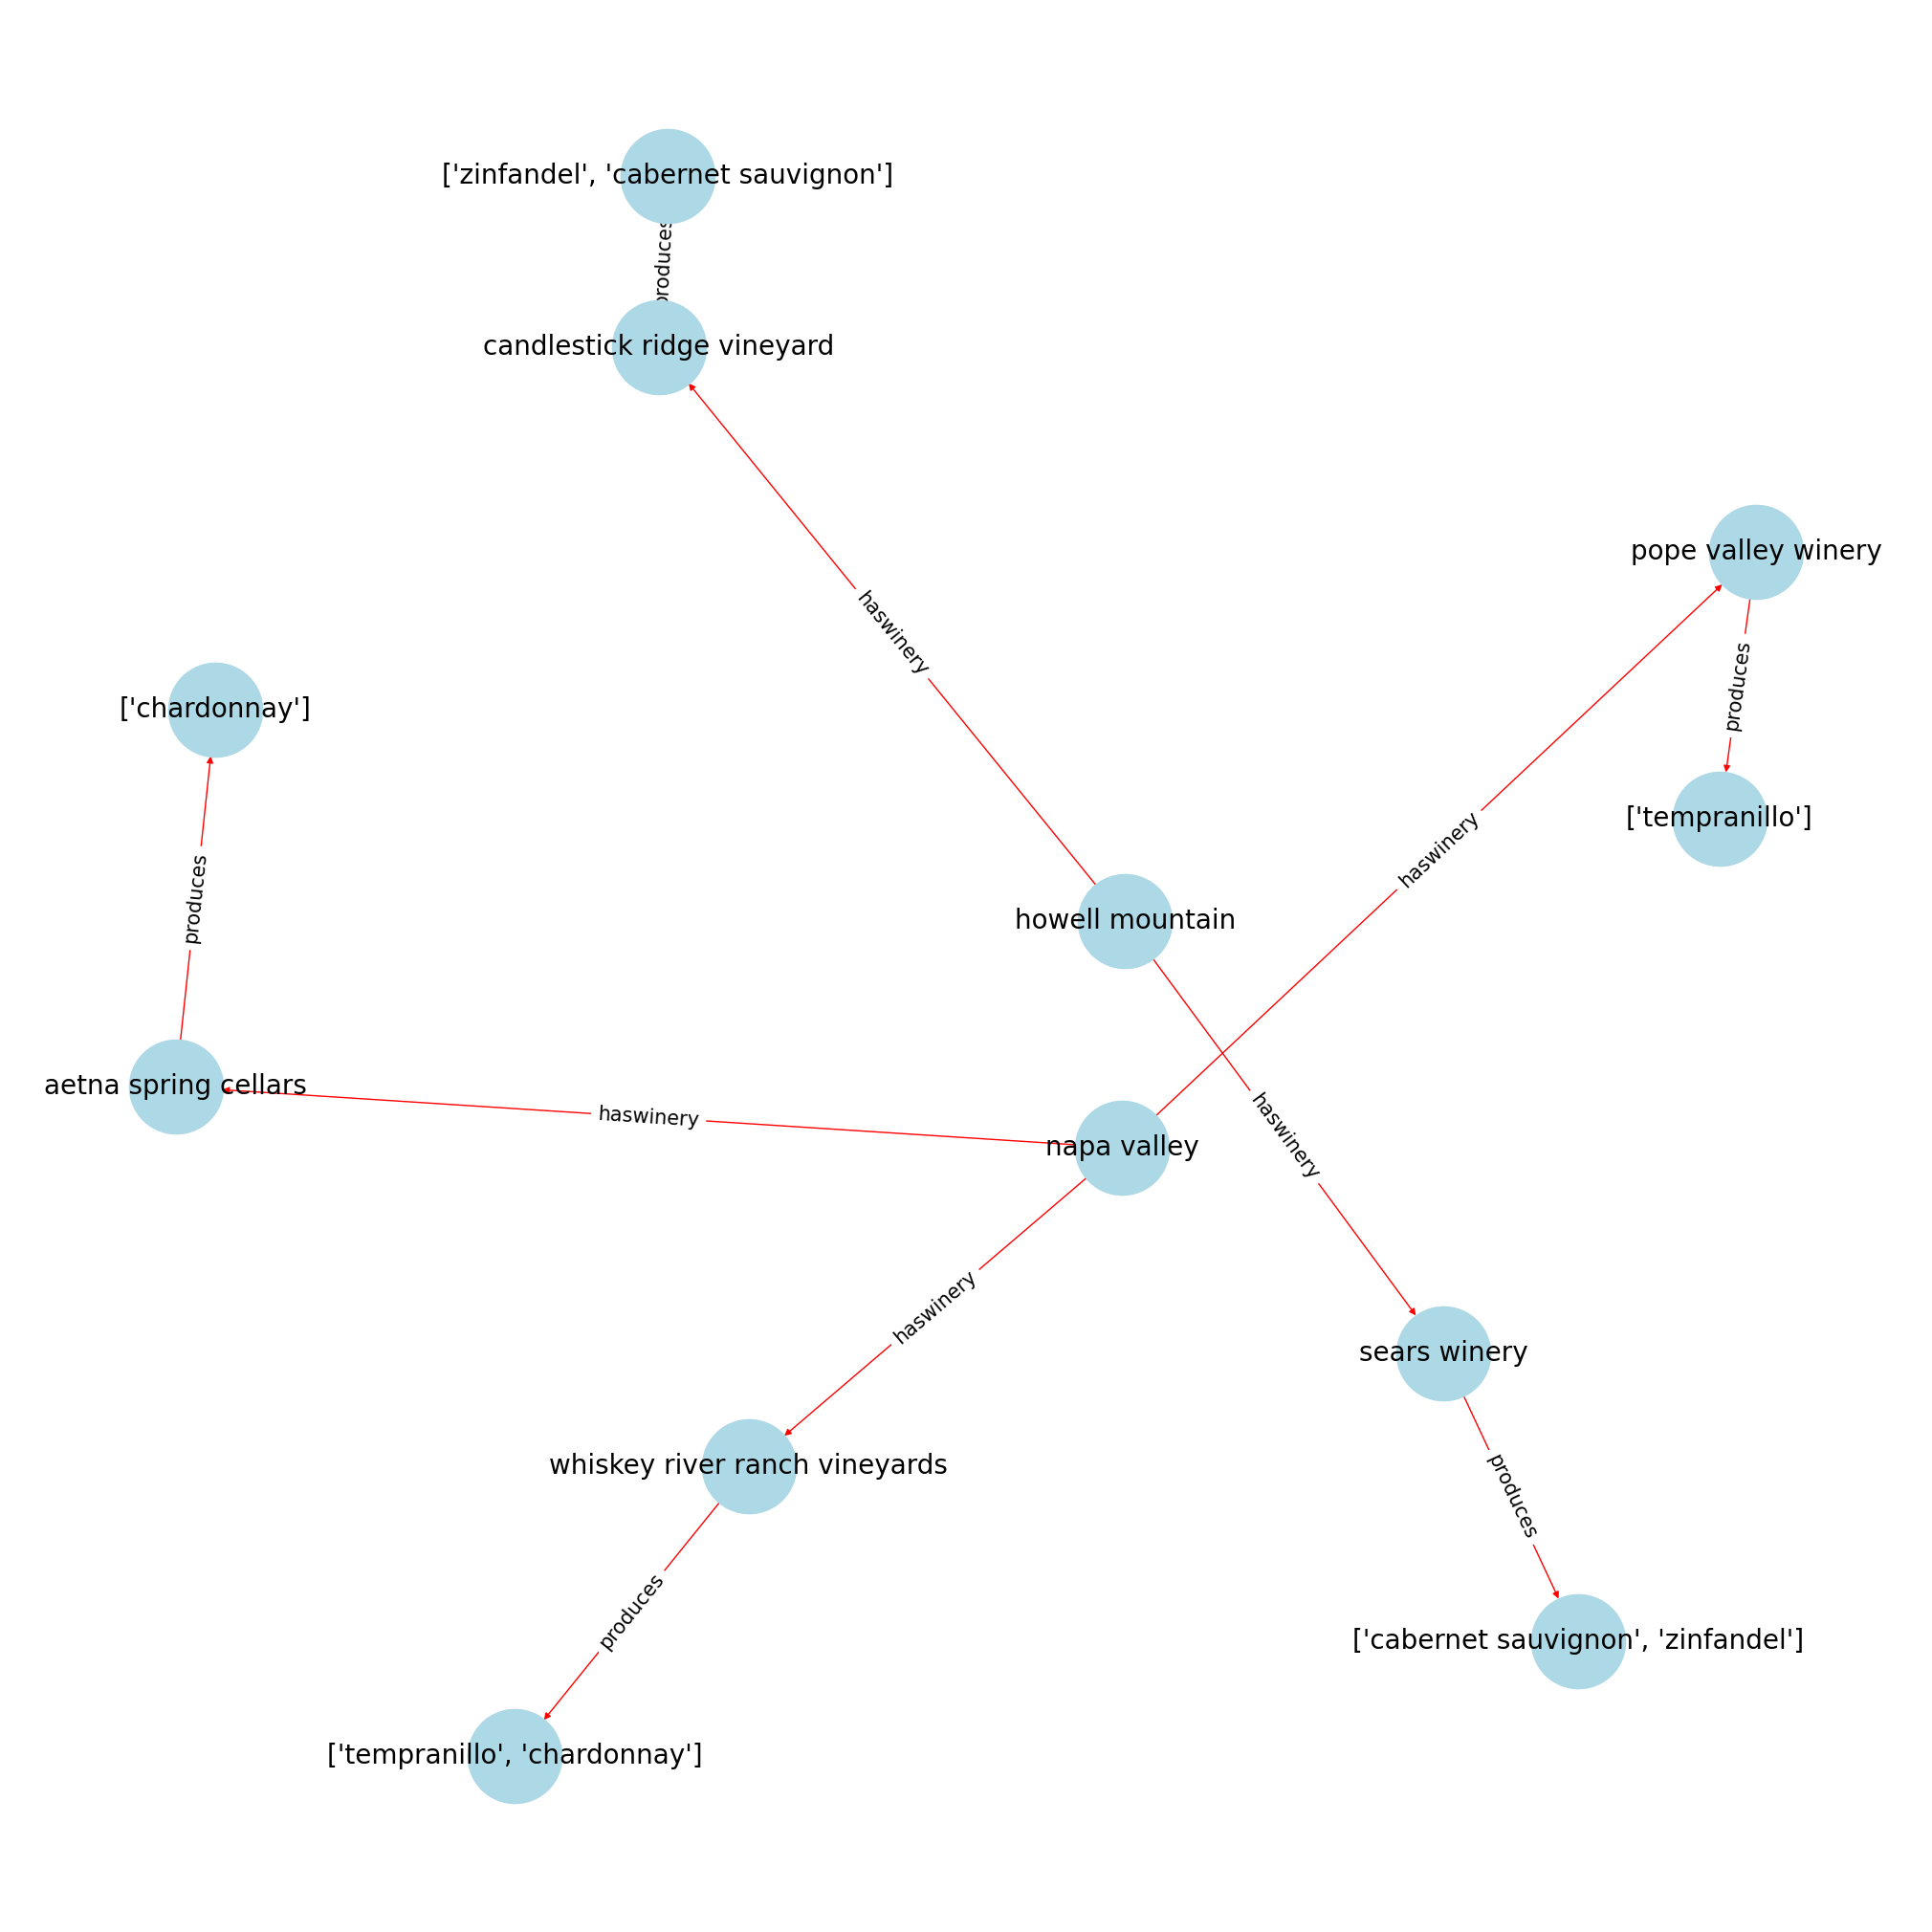

(<networkx.classes.digraph.DiGraph at 0x2481a1b0690>,
 {('napa valley', 'aetna spring cellars'): 'haswinery',
  ('napa valley', 'pope valley winery'): 'haswinery',
  ('napa valley', 'whiskey river ranch vineyards'): 'haswinery',
  ('aetna spring cellars', "['chardonnay']"): 'produces',
  ('pope valley winery', "['tempranillo']"): 'produces',
  ('howell mountain', 'candlestick ridge vineyard'): 'haswinery',
  ('howell mountain', 'sears winery'): 'haswinery',
  ('candlestick ridge vineyard',
   "['zinfandel', 'cabernet sauvignon']"): 'produces',
  ('whiskey river ranch vineyards',
   "['tempranillo', 'chardonnay']"): 'produces',
  ('sears winery', "['cabernet sauvignon', 'zinfandel']"): 'produces'})

In [49]:
create_graph(nodes)